In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv("alquilereslimpio.csv")

In [15]:
media = df['precio'].mean()
mediana = df['precio'].median()
moda = df['precio'].mode()[0]  # mode() devuelve una serie, por lo que tomamos el primer valor

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Media: 1814.0082930200415
Mediana: 1200.0
Moda: 1200.0


In [16]:
df_limpio = df.dropna(subset=['precio'])

Q1 = df_limpio['precio'].quantile(0.25)
Q3 = df_limpio['precio'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Límite Inferior: {limite_inferior}")
print(f"Límite Superior: {limite_superior}")
print(f"Rango de precios: {df_limpio['precio'].min()} - {df_limpio['precio'].max()}")

Q1: 800.0
Q3: 2100.0
IQR: 1300.0
Límite Inferior: -1150.0
Límite Superior: 4050.0
Rango de precios: 1.0 - 80000.0


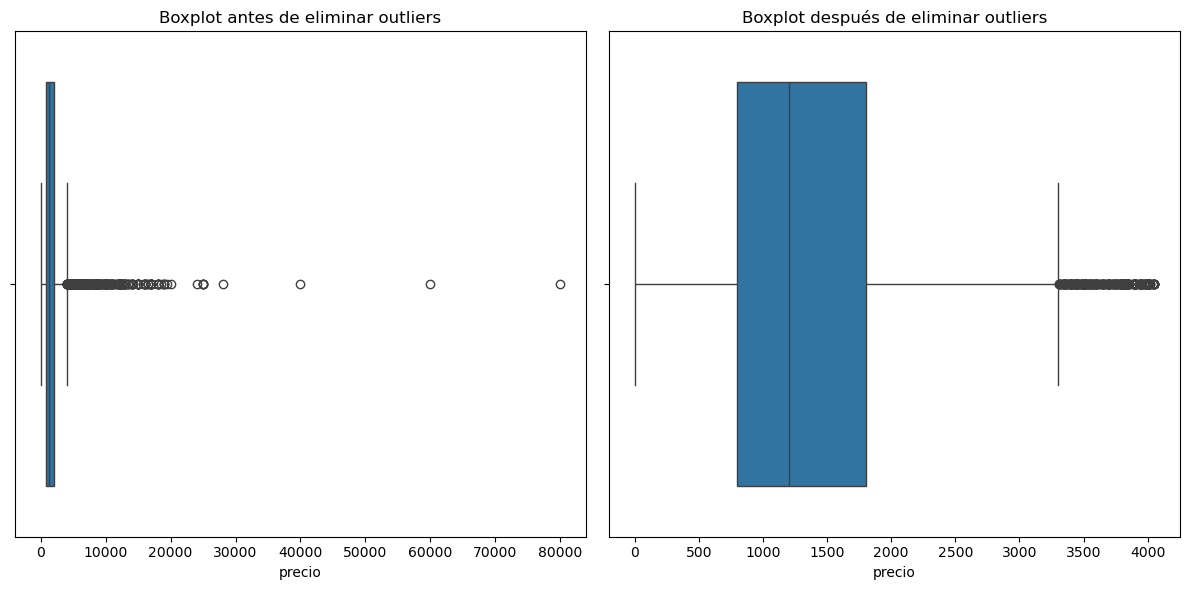

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['precio'])
plt.title('Boxplot antes de eliminar outliers')

df_limpio = df_limpio[(df_limpio['precio'] >= limite_inferior) & (df_limpio['precio'] <= limite_superior)]
plt.subplot(1, 2, 2)
sns.boxplot(x=df_limpio['precio'])
plt.title('Boxplot después de eliminar outliers')

plt.tight_layout()
plt.show()